<a href="https://colab.research.google.com/github/rafysp/PCVK_Ganjil_23-24/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


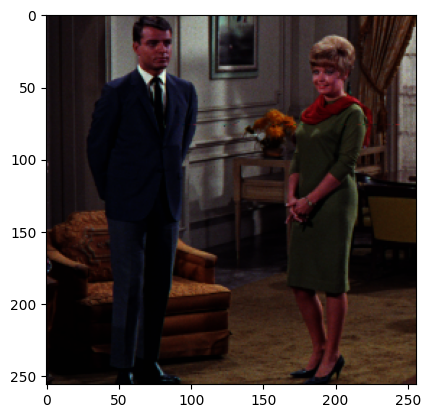

In [20]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
from math import log10, sqrt, pow
import os
import glob

img = cv.imread('/content/drive/MyDrive/PCVK/Images/couple.tiff')
img_color = cv.cvtColor(img,cv.COLOR_BGR2RGB)

plt.imshow(img_color)

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 1


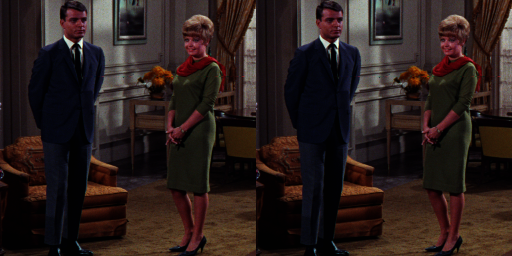

In [21]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
    gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
    print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Images/couple.tiff')
gamma_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            gamma_image[y,x,c] = np.clip(255 * pow(original[y,x,c]/255,(1/gamma)), 0, 255)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

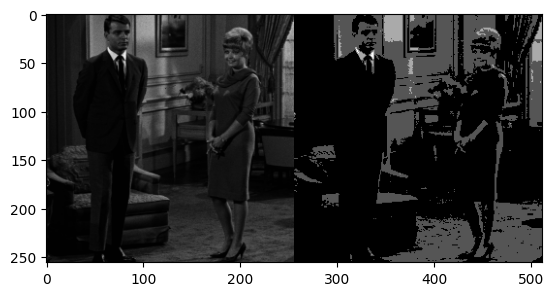

In [22]:
# Buat Simulasi Image Depth
bit_depth=2
level = 255 / (pow(2,bit_depth)-1)
original = cv.imread('/content/drive/MyDrive/PCVK/Images/couple.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    depth_image[y,x] = np.clip(round(original[y,x]/level) * level, 0, 255)

final_frame = cv.hconcat((original, depth_image))
plt.imshow(final_frame, cmap='gray')

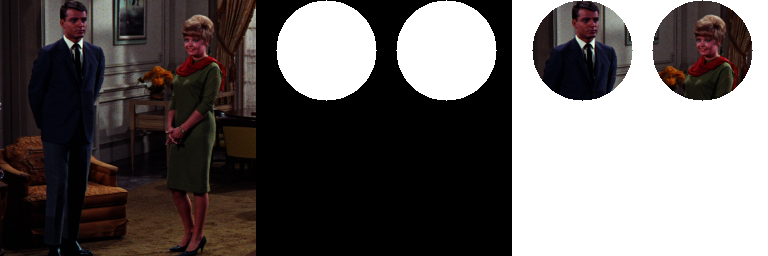

In [30]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/couple.tiff')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 50), 50, (255,255,255), -1)

mask2 = np.zeros(img.shape, dtype=np.uint8)
mask2 = cv.circle(mask, (190, 50), 50, (255,255,255), -1)

result = img & mask & mask2
# fungsi dari opencv berikut juga bisa digunakan
# result = cv.bitwise_and(image, mask)
result[mask==0] = 255

final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)

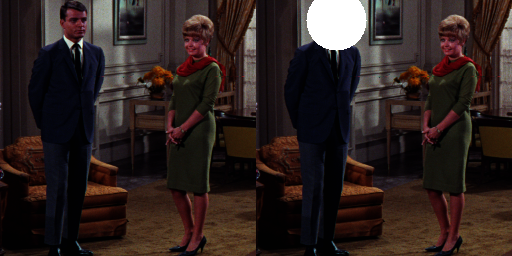

In [31]:
img_org = cv.imread('/content/drive/MyDrive/PCVK/Images/couple.tiff')

mask = np.zeros(img_org.shape, dtype=np.uint8)
mask = cv.circle(mask, (80,20), 30, (255,255,255), -1)

result = img_org | mask

org_frame = cv.hconcat((img_org, result))
cv2_imshow(org_frame)

#NOT


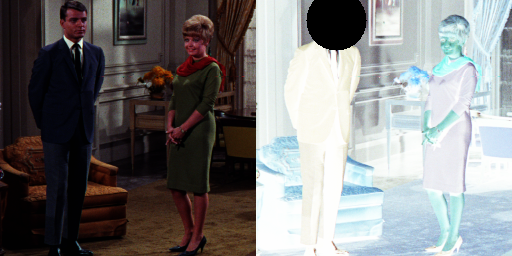

In [32]:
img_org = cv.imread('/content/drive/MyDrive/PCVK/Images/couple.tiff')

mask = np.zeros(img_org.shape, dtype=np.uint8)
mask = cv.circle(mask, (80,20), 30, (255,255,255), -1)

result = ~img_org & ~mask

org_frame = cv.hconcat((img_org, result))
cv2_imshow(org_frame)

#NAND


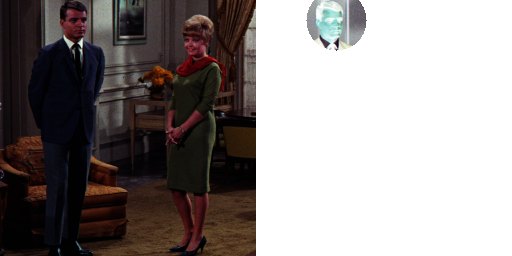

In [34]:
img_org = cv.imread('/content/drive/MyDrive/PCVK/Images/couple.tiff')

mask = np.zeros(img_org.shape, dtype=np.uint8)
mask = cv.circle(mask, (80,20), 30, (255,255,255), -1)

result = cv.bitwise_not(cv.bitwise_and(img_org, mask))

org_frame = cv.hconcat((img_org, result))
cv2_imshow(org_frame)

#XOR

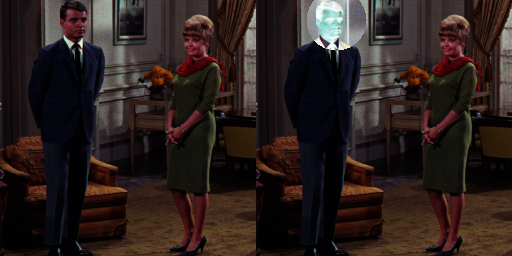

In [36]:
img_org = cv.imread('/content/drive/MyDrive/PCVK/Images/couple.tiff')

mask = np.zeros(img_org.shape, dtype=np.uint8)
mask = cv.circle(mask, (80,20), 30, (255,255,255), -1)

result = cv.bitwise_xor(img_org, mask)

org_frame = cv.hconcat((img_org, result))
cv2_imshow(org_frame)